# Setup

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk, messagebox
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 1. Loading dataset

In [3]:
df = pd.read_csv("dataset.csv")
df.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level,internet_access,parental_education,extracurricular,part_time_job
0,52.72,6.85,0.99,0.22,71.10,medium,Yes,NaN,Yes,No
1,42.14,8.82,0.88,0.56,62.24,medium,Yes,NaN,No,No
2,55.24,2.20,0.68,1.00,65.27,medium,Yes,NaN,Yes,No
3,69.83,6.13,0.52,0.22,66.61,low,Yes,NaN,Yes,No
4,40.54,3.70,0.83,0.33,58.97,medium,Yes,High School,Yes,No


In [4]:
df.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,44.560240,5.063880,0.684280,0.533540,63.753240
std,16.232416,1.949214,0.214905,0.277497,7.114181
min,0.000000,0.000000,0.000000,0.000000,40.200000
25%,32.770000,3.812500,0.530000,0.330000,58.812500
50%,44.655000,5.060000,0.700000,0.560000,63.825000
75%,55.057500,6.302500,0.842500,0.780000,68.587500
max,100.000000,10.000000,1.000000,1.000000,92.010000


In [5]:
print(f"shape of dataset: {df.shape}")

shape of dataset: (500, 10)


In [6]:
print("column names:")
print(df.columns.tolist())

column names:
['study_hours_per_week', 'sleep_hours_per_day', 'attendance_percentage', 'assignments_completed', 'final_grade', 'participation_level', 'internet_access', 'parental_education', 'extracurricular', 'part_time_job']


# 2. Descriptive statistical analyses

## Mean, median, maximum and first quartile

In [7]:
print("mean of FINAL_GRADE: ", df["final_grade"].mean())
print("middle of FINAL_GRADE: ", df["final_grade"].median())
print("max of FINAL_GRADE: ", df["final_grade"].max())
print("Q1 of FINAL_GRADE: ", df["final_grade"].quantile(0.25))

print("=========================================================")

print("mean of SLEEP_HOURS: ", df["sleep_hours_per_day"].mean())
print("middle of SLEEP_HOURS: ", df["sleep_hours_per_day"].median())
print("max of SLEEP_HOURS: ", df["sleep_hours_per_day"].max())
print("Q1 of SLEEP_HOURS: ", df["sleep_hours_per_day"].quantile(0.25))

print("=========================================================")

print("mean of STUDY_HOURS_PER_WEEK: ", df["study_hours_per_week"].mean())
print("middle of STUDY_HOURS_PER_WEEK: ", df["study_hours_per_week"].median())
print("max of STUDY_HOURS_PER_WEEK: ", df["study_hours_per_week"].max())
print("Q1 of STUDY_HOURS_PER_WEEK: ", df["study_hours_per_week"].quantile(0.25))

mean of FINAL_GRADE:  63.753240000000005
middle of FINAL_GRADE:  63.825
max of FINAL_GRADE:  92.01
Q1 of FINAL_GRADE:  58.8125
mean of SLEEP_HOURS:  5.063879999999999
middle of SLEEP_HOURS:  5.06
max of SLEEP_HOURS:  10.0
Q1 of SLEEP_HOURS:  3.8125
mean of STUDY_HOURS_PER_WEEK:  44.56024000000001
middle of STUDY_HOURS_PER_WEEK:  44.655
max of STUDY_HOURS_PER_WEEK:  100.0
Q1 of STUDY_HOURS_PER_WEEK:  32.77


## Pie chart

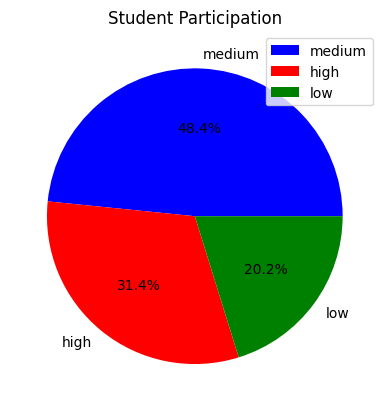

In [8]:
participation = df["participation_level"].value_counts()

plt.pie(participation.values, 
        labels = participation.index, 
        colors=["blue", "red", "green"],
        autopct='%1.1f%%')
plt.title("Student Participation")
plt.legend()
plt.show()

# 3. Data cleaning and preprocessing

In [9]:
df['internet_access'] = df['internet_access'].apply(lambda x: 1.0 if x == "Yes" else 0.0)
df["part_time_job"] = df["part_time_job"].apply(lambda x: 1.0 if x == "Yes" else 0.0)
df["extracurricular"] = df["extracurricular"].apply(lambda x: 1.0 if x == "Yes" else 0.0)

def convert_to_num(participation_level):
    if participation_level == "low":
        return 0.0
    elif participation_level == "medium":
        return 1.0
    elif participation_level == "high":
        return 2.0
        
df["participation_level"] = df["participation_level"].apply(convert_to_num)

## Check for missing and abnormal values

In [10]:
print("Lost values:\n", df.isna().sum())

Lost values:
 study_hours_per_week       0
sleep_hours_per_day        0
attendance_percentage      0
assignments_completed      0
final_grade                0
participation_level        0
internet_access            0
parental_education       213
extracurricular            0
part_time_job              0
dtype: int64


In [11]:
df.drop(columns="parental_education", inplace=True)
print(df.isna().sum())

study_hours_per_week     0
sleep_hours_per_day      0
attendance_percentage    0
assignments_completed    0
final_grade              0
participation_level      0
internet_access          0
extracurricular          0
part_time_job            0
dtype: int64


In [12]:
median_sleep = df["sleep_hours_per_day"].median()
df.loc[df["sleep_hours_per_day"] < 2, "sleep_hours_per_day"] = median_sleep

df.loc[(df["study_hours_per_week"] < 15) | (df["study_hours_per_week"] > 90), "study_hours_per_week"] = np.nan
df.dropna(inplace=True)

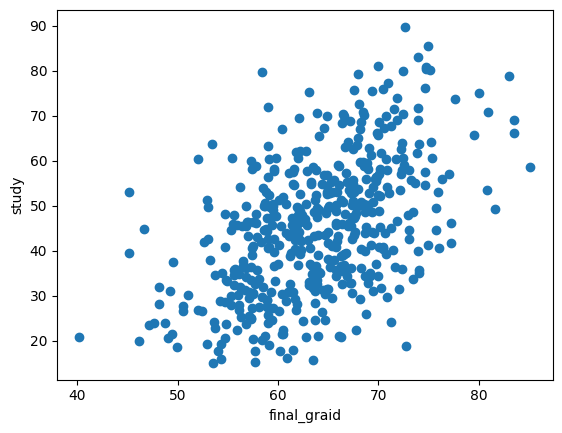

In [13]:
plt.scatter(df["final_grade"], df["study_hours_per_week"])
plt.xlabel("final_graid")
plt.ylabel("study")
plt.show()

## Histogram and box plot

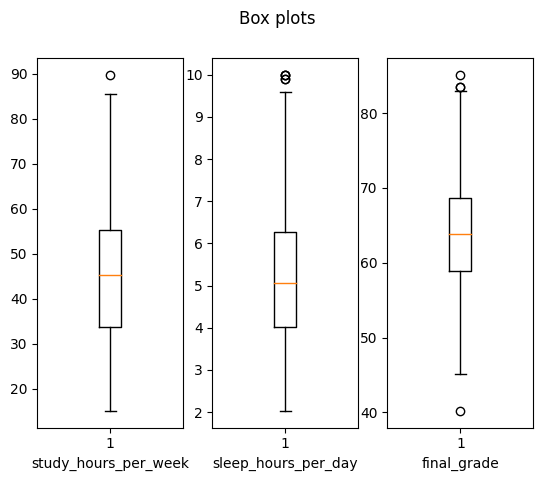

In [14]:
# Box Plot
fig, axs = plt.subplots(1, 3)

for i, column in enumerate(["study_hours_per_week", "sleep_hours_per_day", "final_grade"]):
    axs_i = axs[i]
    axs_i.boxplot(df[column])
    axs_i.set_xlabel(column)

fig.suptitle("Box plots")
plt.show()

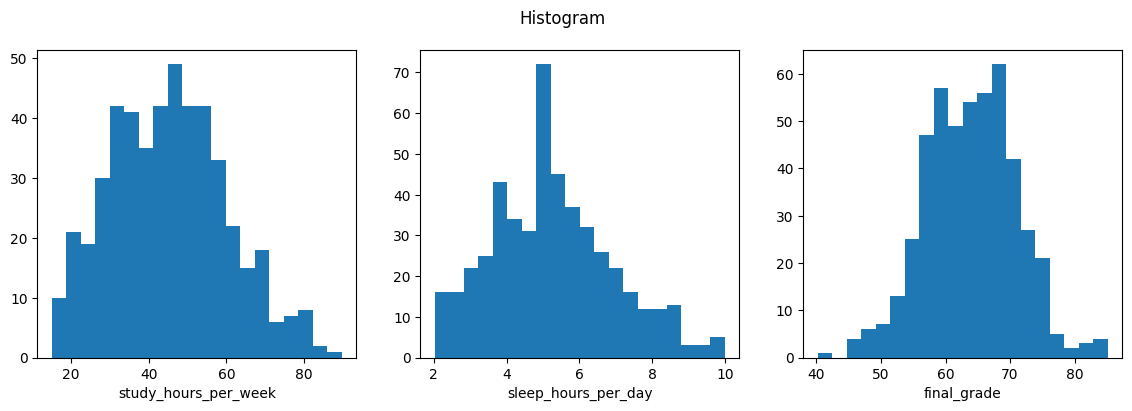

In [15]:
# histogram
fig, axs = plt.subplots(1, 3)

for i, column in enumerate(["study_hours_per_week", "sleep_hours_per_day", "final_grade"]):
    axs_i = axs[i]
    axs_i.hist(df[column], bins=20)
    axs_i.set_xlabel(column)

fig.set_size_inches(14, 4)
fig.suptitle("Histogram")
plt.show()

# 4. Identifying effective relationships and characteristics

## Correlation diagram(Heatmap) and feature selection

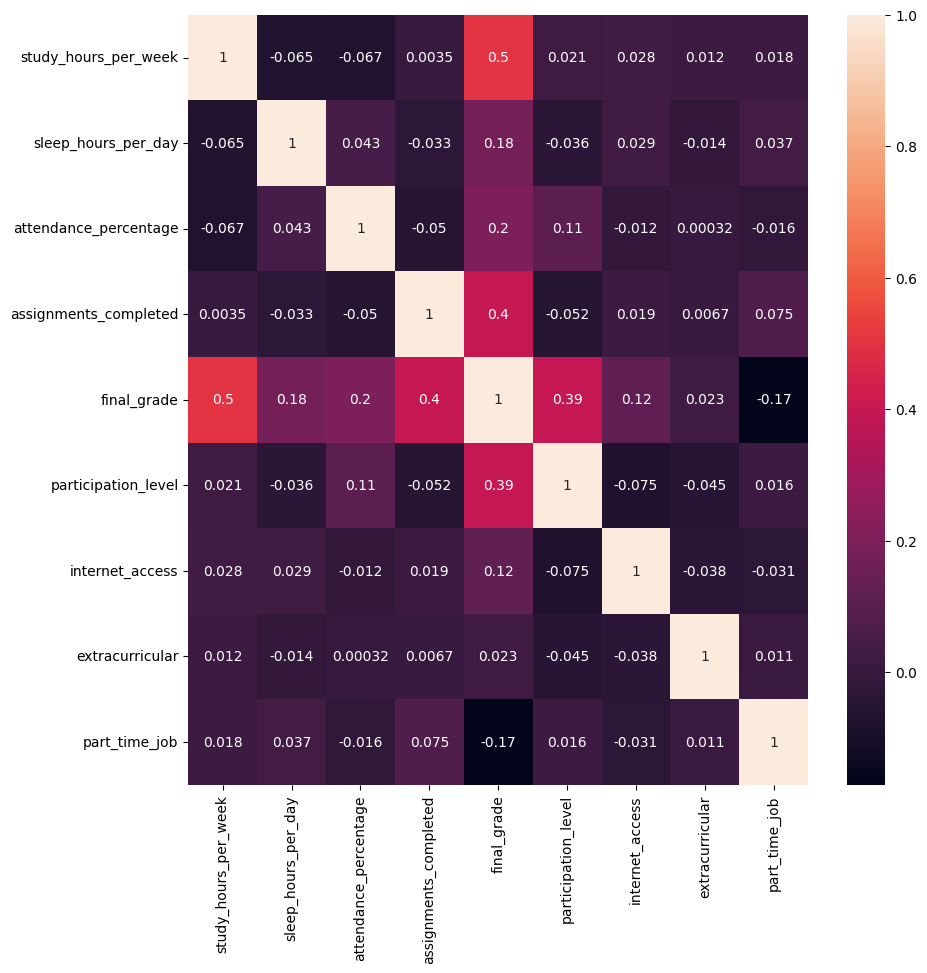

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Performance-based segmentation histogram

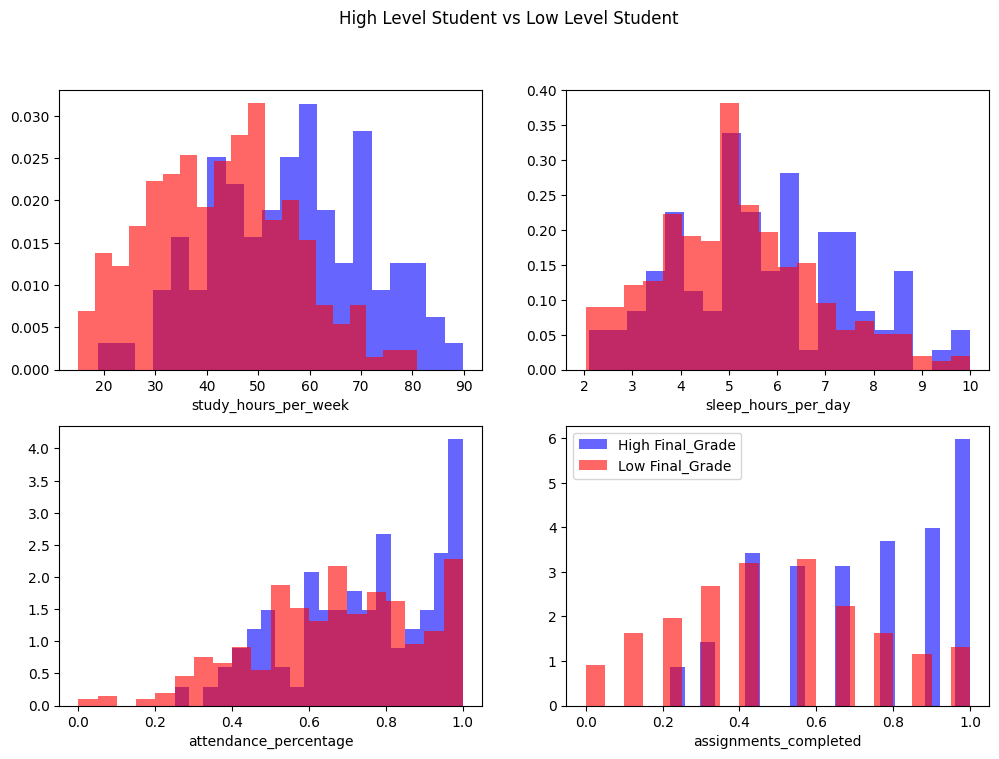

In [17]:
high_final_grade = df[df["final_grade"] >= 70]
low_final_grade = df[df["final_grade"] < 70]

columns = ["study_hours_per_week", "sleep_hours_per_day", "attendance_percentage", "assignments_completed"]
plot_rows = 2
plot_cols = 2
fig, axs = plt.subplots(plot_rows, plot_cols)

for i, column in enumerate(columns):
    axs_i = axs[i//plot_rows][i%plot_cols]

    axs_i.hist(high_final_grade[column], bins=20, 
                color="blue", label="High Final_Grade", 
                alpha=0.6, density=True)

    axs_i.hist(low_final_grade[column], bins=20, 
                color="red", label="Low Final_Grade", 
                alpha=0.6, density=True)
    axs_i.set_xlabel(column)

fig.set_size_inches(12,8)
fig.suptitle("High Level Student vs Low Level Student")
plt.legend()
plt.show()

## Scatter Plot

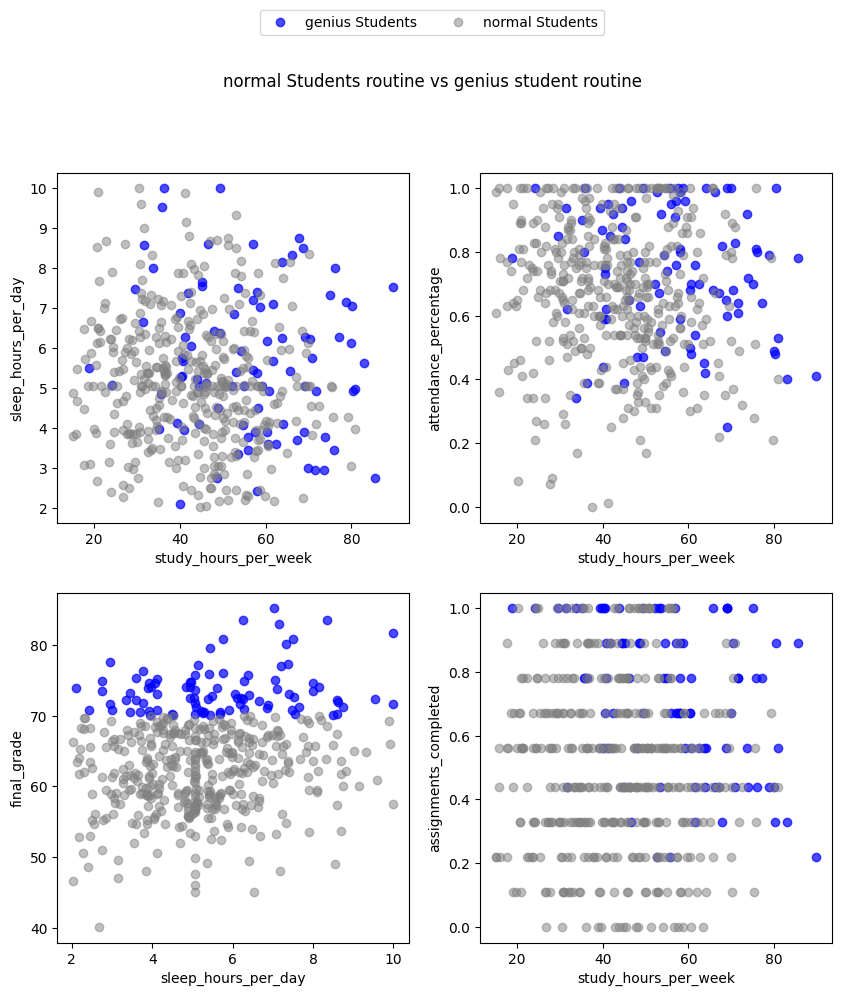

In [18]:
pair_columns = [["study_hours_per_week", "sleep_hours_per_day"],
            ["study_hours_per_week", "attendance_percentage"],
            ["sleep_hours_per_day", "final_grade"],
            ["study_hours_per_week", "assignments_completed"]]

plot_rows = 2
plotf_columns = 2
fig, axs = plt.subplots(plot_rows, plot_cols)

for i, columns in enumerate(pair_columns):
    axs_i = axs[i//plot_rows][i%plot_cols]

    axs_i.scatter(high_final_grade[columns[0]], high_final_grade[columns[1]], 
                    color="blue", label="genius Students", alpha=0.7)
    axs_i.scatter(low_final_grade[columns[0]], low_final_grade[columns[1]], 
                    color="gray", label="normal Students", alpha=0.5)

    axs_i.set_xlabel(columns[0])
    axs_i.set_ylabel(columns[1])

fig.set_size_inches(10,10) 
fig.suptitle("normal Students routine vs genius student routine")

handles, labels = [], []
for ax in axs.flat:
    for h, l in zip(*ax.get_legend_handles_labels()):
        if l not in labels:
            handles.append(h)
            labels.append(l)

fig.legend(handles, labels,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.05),
           ncol=2)
plt.show()

# 5. Modeling and forecasting

## Legislation based on IF-ELSE statements

In [19]:
print(high_final_grade["sleep_hours_per_day"].mean())
print(high_final_grade["study_hours_per_week"].mean())
print(high_final_grade["assignments_completed"].mean())

5.706444444444445
56.28822222222223
0.7191111111111113


In [20]:
def rule_based_model(sleep_hours, study_hours, assignment, part_time_job, participation_level):
    if sleep_hours > 4 and \
        study_hours > 45 and \
        assignment > 0.5 and \
        part_time_job == 0 and \
        participation_level == 1 or participation_level == 2:
        return "A"
    elif sleep_hours < 4 and \
        study_hours < 43 and \
        assignment < 0.5 and \
        part_time_job == 0 and \
        participation_level == 1:
        return "B"
    else:
        return "C"

## Checking the correctness of your rules

In [21]:
correctly_predicted = 0
incorrectly_predicted = 0

for i, row in df.iterrows():
    rule_base_model_pred = rule_based_model(
        sleep_hours=row["sleep_hours_per_day"], 
        study_hours=row["study_hours_per_week"], 
        assignment=row["assignments_completed"], 
        part_time_job=row["part_time_job"], 
        participation_level=row["participation_level"]
    )
    if rule_base_model_pred == "A":
        correctly_predicted += 1
    else:
        incorrectly_predicted += 1

print(correctly_predicted, incorrectly_predicted)
rule_based_accuracy = int(correctly_predicted/len(df) * 100)
print(f"correctly predicted: {correctly_predicted}\nincorrectly predicted: {incorrectly_predicted}")
print(f"Accuracy of the rule_based_model: {rule_based_accuracy}%")

175 310
correctly predicted: 175
incorrectly predicted: 310
Accuracy of the rule_based_model: 36%


In [22]:
df.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level,internet_access,extracurricular,part_time_job
0,52.72,6.85,0.99,0.22,71.10,1.0,1.0,1.0,0.0
1,42.14,8.82,0.88,0.56,62.24,1.0,1.0,0.0,0.0
2,55.24,2.20,0.68,1.00,65.27,1.0,1.0,1.0,0.0
3,69.83,6.13,0.52,0.22,66.61,0.0,1.0,1.0,0.0
4,40.54,3.70,0.83,0.33,58.97,1.0,1.0,1.0,0.0


## Dataset preparation

In [23]:
features = df[['study_hours_per_week','sleep_hours_per_day','attendance_percentage',
            'assignments_completed','participation_level',
            'internet_access','extracurricular','part_time_job']]
final_grade = df["final_grade"]

X_train, X_test, y_train, y_test = train_test_split(features, final_grade, test_size=0.13, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### LinearRegression vs DecisionTreeRegressor

In [24]:
models = [LinearRegression(), DecisionTreeRegressor()]
# اسم مدل من Academic advisor (مشاور تحصیلی) می باشد
for model in models:
    academic_advisor = model
    academic_advisor.max_iter = 10000
    academic_advisor.fit(X_train_scaled, y_train)
    model_pred = academic_advisor.predict(X_test)

    print(f"{model} mae: {mean_absolute_error(y_test, model_pred)}")


LinearRegression() mae: 189.29145366427218
DecisionTreeRegressor() mae: 16.018749999999997


c:\Program Files\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Program Files\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


## Train model

In [25]:
model_test = DecisionTreeRegressor()
model_test.max_iter = 10000
model_test.fit(X_train_scaled, y_train)
model_pred = model_test.predict(X_test)

print(f"mae: {mean_absolute_error(y_test, model_pred)}")

mae: 16.5515625


c:\Program Files\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [26]:
joblib.dump(model_test, "model_test.pkl")      # ذخیره مدل
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

### UI

In [28]:
MODEL_PATH = 'model_test.pkl'
SCALER_PATH = 'scaler.pkl'
model = joblib.load(MODEL_PATH)
scaler = joblib.load(SCALER_PATH)

def predict_grade():
    try:
        study_hours = float(entry_study.get())
        sleep_hours = float(entry_sleep.get())
        attendance = float(entry_attendance.get())
        assignments = float(entry_assignments.get())

        part_map = {'low':0, 'medium':1, 'high':2}
        val_participation = part_map[combo_participation.get()]

        yn_map = {'Yes':1, 'No':0}
        val_internet = yn_map[combo_internet.get()]
        val_extracurricular = yn_map[combo_extra.get()]
        val_part_time = yn_map[combo_parttime.get()]

        x = np.array([[study_hours, sleep_hours, attendance, assignments,
                       val_participation, val_internet, val_extracurricular, val_part_time]])

        if scaler is not None:
            x_scaled = scaler.transform(x)
        else:
            x_scaled = x

        if model is None:
            messagebox.showerror('error', 'The model is not loaded.')
            return

        pred = model.predict(x_scaled)
        score = float(pred[0]) if hasattr(pred, '__len__') else float(pred)
        label_result.config(text=f'predicted final grade: {score:.2f}')

    except Exception as e:
        messagebox.showerror('error', f'Invalid input or prediction error\n{e}')

root = tk.Tk()
root.title("🎯 predict Student's final grade")
root.geometry('500x500')
root.configure(bg='#1e1e2f')

style = ttk.Style()
style.theme_use('clam')
style.configure('TLabel', background='#1e1e2f', foreground='white', font=('B Nazanin', 12))
style.configure('TButton', font=('B Nazanin', 12, 'bold'), foreground='#1e1e2f', background='#ff8c42')
style.map('TButton', background=[('active', '#ffa75e')])
style.configure('TCombobox', font=('B Nazanin', 12))

frame = ttk.Frame(root, padding=20)
frame.pack(fill='both', expand=True)

labels_entries = [
    ('study hours per week', 'entry_study'),
    ('sleep hours per day', 'entry_sleep'),
    ('attendance percentage', 'entry_attendance'),
    ('assignments completed', 'entry_assignments')
]

for i,(lbl,varname) in enumerate(labels_entries):
    ttk.Label(frame, text=lbl).grid(row=i, column=0, sticky='e', pady=5)
    e = ttk.Entry(frame)
    e.grid(row=i, column=1, pady=5)
    globals()[varname] = e

row_idx = len(labels_entries)
ttk.Label(frame, text='participation level').grid(row=row_idx, column=0, sticky='e', pady=5)
combo_participation = ttk.Combobox(frame, values=['medium','low','high'], state='readonly')
combo_participation.current(0)
combo_participation.grid(row=row_idx, column=1, pady=5)

row_idx += 1
ttk.Label(frame, text='internet access').grid(row=row_idx, column=0, sticky='e', pady=5)
combo_internet = ttk.Combobox(frame, values=['Yes','No'], state='readonly')
combo_internet.current(0)
combo_internet.grid(row=row_idx, column=1, pady=5)

row_idx += 1
ttk.Label(frame, text='extracurricular').grid(row=row_idx, column=0, sticky='e', pady=5)
combo_extra = ttk.Combobox(frame, values=['Yes','No'], state='readonly')
combo_extra.current(1)
combo_extra.grid(row=row_idx, column=1, pady=5)

row_idx += 1
ttk.Label(frame, text='part time job').grid(row=row_idx, column=0, sticky='e', pady=5)
combo_parttime = ttk.Combobox(frame, values=['Yes','No'], state='readonly')
combo_parttime.current(1)
combo_parttime.grid(row=row_idx, column=1, pady=5)

row_idx += 1
predict_btn = ttk.Button(frame, text='prediction final grade', command=predict_grade)
predict_btn.grid(row=row_idx, column=0, columnspan=2, pady=20)

row_idx += 1
label_result = ttk.Label(frame, text='The result is displayed here.')
label_result.grid(row=row_idx, column=0, columnspan=2, pady=10)

root.mainloop()


c:\Program Files\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
